In [0]:
from keras.applications import VGG16
import warnings
warnings.filterwarnings('ignore')

In [6]:
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from google.colab import files
files.upload()

In [8]:
!ls

cat.jpeg  elephant.jpg	sample_data


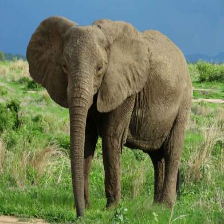

In [9]:
from google.colab.patches import cv_imshow
import cv2
img = cv2.imread('elephant.jpg')
img = cv2.resize(img, (224,224))
cv_imshow(img)

In [0]:
img = img.reshape((1,*img.shape))

In [11]:
print(img.shape)

(1, 224, 224, 3)


In [0]:
pred = model.predict(img)

In [0]:
from keras.applications.vgg16 import decode_predictions

In [14]:
decode_predictions(pred,top=3)[0]

[('n02504458', 'African_elephant', 0.777349),
 ('n01871265', 'tusker', 0.19961804),
 ('n02504013', 'Indian_elephant', 0.02303244)]

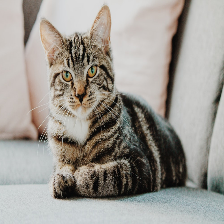

In [15]:
img_2 = cv2.imread('cat.jpeg')
img_2 = cv2.resize(img_2, (224,224))
cv_imshow(img_2)

In [0]:
img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

In [0]:
img_2 = img_2.reshape((1,*img_2.shape))

In [18]:
print(img_2.shape)

(1, 224, 224, 3)


In [0]:
pred_2 = model.predict(img_2)

In [20]:
decode_predictions(pred_2,top=3)[0]

[('n02123045', 'tabby', 0.3571398),
 ('n02123159', 'tiger_cat', 0.34323272),
 ('n02124075', 'Egyptian_cat', 0.25828928)]